In [39]:
from dask.distributed import Client

client = Client(n_workers=4)

distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing
distributed.nann

In [40]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [41]:
# data = [1, 2, 3, 4, 5, 6, 7, 8]
data = list(range(0,200))

In [42]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 1min 1s, sys: 20.8 s, total: 1min 22s
Wall time: 3min 20s


In [43]:
total

20100

In [44]:
from dask import delayed

Before computing:  Delayed('sum-2dff36b1-ee3f-4a2c-a64b-0a4501a3c251')
After computing:  20100
CPU times: user 17.1 s, sys: 6.01 s, total: 23.2 s
Wall time: 53.7 s


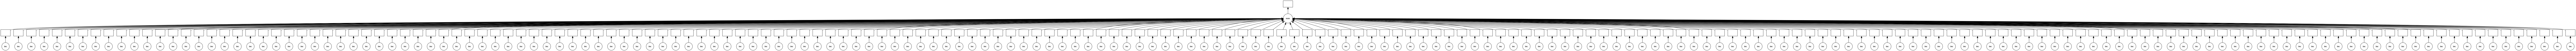

In [45]:
%%time
# Your parallel code here...

results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print("Before computing: ",total)
results = total.compute()
print("After computing: ",results)

total.visualize()